# 数据预处理

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')
boss = pd.read_csv('./boss岗位.csv')

In [158]:
# 详情页不用，删了
del boss['详情页']
boss.head(2)

,标题,地区,公司名,公司领域,薪资,经验,规模,福利
0,数据分析师,北京·海淀区·公主坟,锐捷网络,通信/网络设备,20-30K·13薪,3-5年本科,1000-9999人,通讯补贴，节日福利，五险一金，定期体检，带薪年假，餐补，包吃，加班补助，员工旅游，零食下午茶...
1,数据分析师,上海·浦东新区·张江,中电金信,计算机软件,15-25K,经验不限本科,10000人以上,定期体检，节日福利，五险一金，补充医疗保险，带薪年假，零食下午茶


# 单列分析

## 标题

In [159]:
# 按照IT行业几个主流方向分类
def job_type(x):
    if x.__contains__('数据分析') == True:
        return '数据分析师'
    elif x.__contains__('后端') == True:
        return '后端工程师'
    elif x.__contains__('前端') == True or x.__contains__('web') == True or x.__contains__('WEB') == True or x.__contains__('Web') == True:
        return '前端工程师'
    elif x.__contains__('人工智能') == True or x.__contains__('AI') == True:
        return 'AI人工智能工程师'
    elif x.__contains__('大数据') == True :
        return '大数据工程师'
    # elif x.__contains__('JAVA') == True or x.__contains__('Java') == True or x.__contains__('java') == True:
    #     return 'JAVA工程师'
    # elif x.__contains__('python') == True or x.__contains__('Python') == True:
    #     return 'python工程师'
    # elif x.__contains__('算法') == True:
    #     return '算法工程师'
    elif x.__contains__('爬虫') == True:
        return '爬虫工程师'
    elif x.__contains__('运营') == True or x.__contains__('运维') == True:
        return '运营工程师'
    elif x.__contains__('研发') == True or x.__contains__('开发') == True:
        return '开发工程师'
    elif x.__contains__('数据标注') == True:
        return '数据标注师'
    elif x.__contains__('数据挖掘') == True:
        return '数据挖掘工程师'
    elif x.__contains__('老师') == True or x.__contains__('讲师') == True:
        return '编程老师'
    elif x.__contains__('软件') == True:
        return '软件工程师'
    else:
        return '其他'

In [160]:
# 按照IT行业几个主流编程语言分类
def pro_lang(x):
    if x.__contains__('JAVA') == True or x.__contains__('Java') == True or x.__contains__('java') == True:
        return 'java'
    elif x.__contains__('python') == True or x.__contains__('Python') == True:
        return 'python'
    elif x.__contains__('C++') == True or x.__contains__('c++') == True:
        return 'c++'
    else:
        return '其他/未标明'

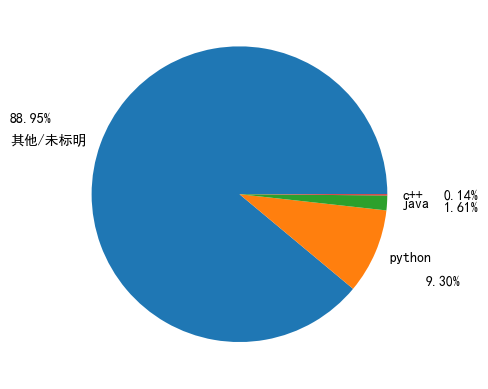

In [161]:
boss['编程语言'] = boss['标题'].apply(lambda x : pro_lang(x))
language = boss['编程语言'].value_counts()
plt.pie(x=language,labels=language.index,autopct='%.2f%%',pctdistance=1.5)
plt.show()

# 在已标明使用语言的工作中，使用python的招聘岗位最多

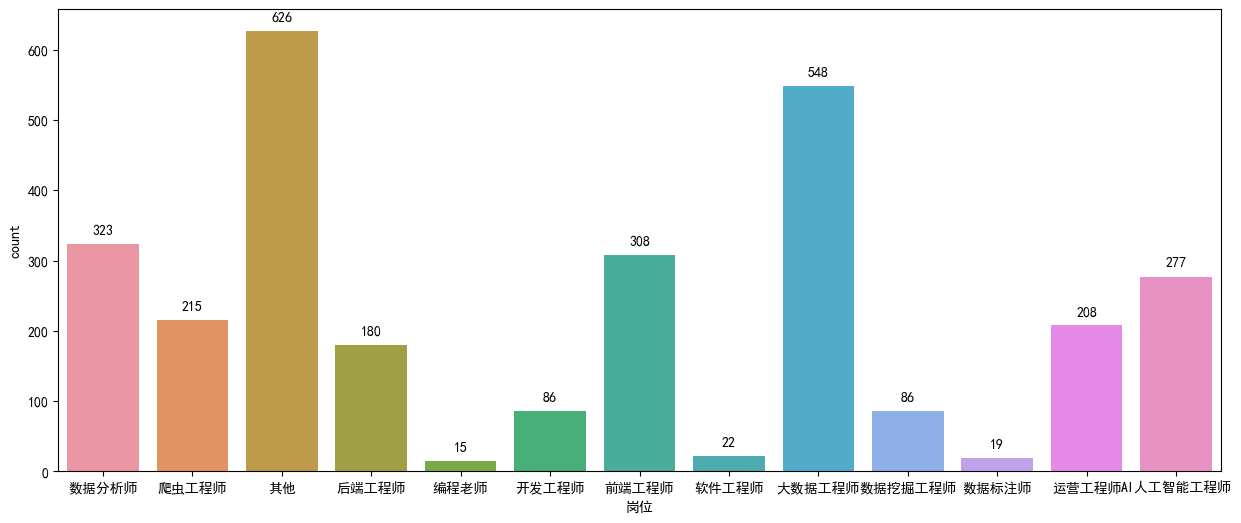

In [162]:
boss['岗位'] = boss['标题'].apply(lambda x : job_type(x))
# boss['岗位'].value_counts()
plt.figure(figsize=(15,6))
ax = sns.countplot(boss,x=boss['岗位'])
#显示柱形图的数值标签
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# 数据分析师、大数据工程师、人工智能工程师、前端工程师成为IT领域招聘最为火爆的岗位

## 是否为实习生

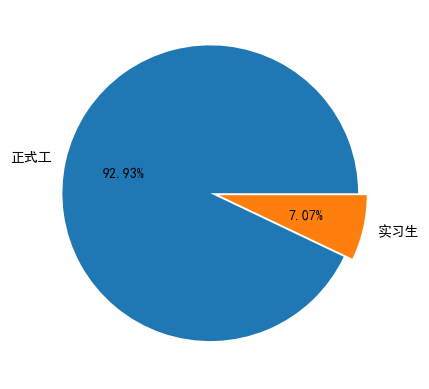

In [163]:
boss['招聘类型'] = boss['标题'].apply(lambda x: operator.contains(str(x),'实习'))
boss['招聘类型'] = boss['招聘类型'].replace({True:'实习生',False:'正式工'})
intern = boss['招聘类型'].value_counts()
plt.pie(intern,labels=intern.index,explode=(0.03,0.03),autopct='%.2f%%')
plt.show()

# 主要还是以招聘正式工为主

## 地区

In [164]:
boss['市'] = boss['地区'].apply(lambda x: x.split('·')[0])
# boss['区'] = boss['地区'].apply(lambda x: x.split('·')[1])

## 薪资水平

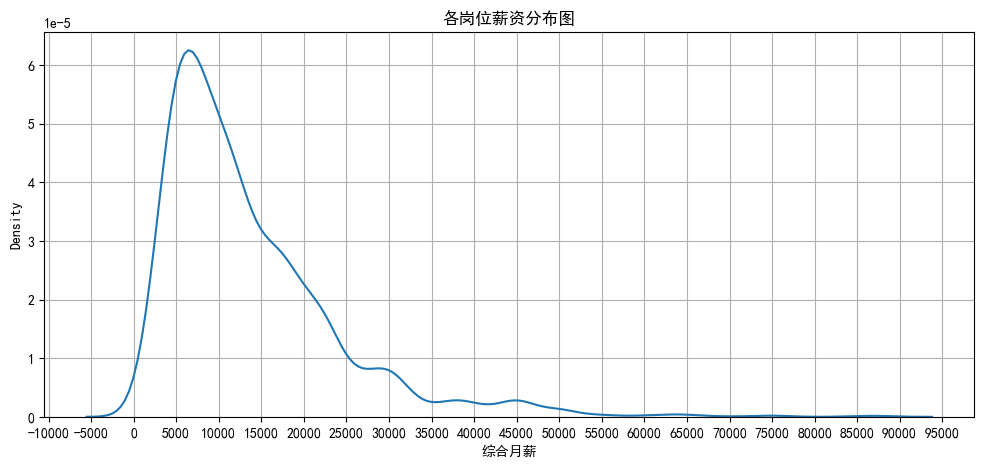

In [238]:
# 会有三种情况
# salary('130-220元/天')
# salary('10-15K')
# salary('10-15K·13薪')
# salary('5-50元/时')
# salary('500-1000元/月')

def salary(x):
    if operator.contains(x,'K'):
        x = x[:-1]
        x = x.split('K')
        x = x[0].split('-')
        x = int((int(x[0]) + int(x[1]))/2*1000)
        return x
    elif operator.contains(x,'天'):
        x = x[:-3]
        x = x.split('-')
        x = int((int(x[0]) + int(x[1]))/2)*23
        return x
    elif operator.contains(x,'时'):
        x = x[:-3]
        x = x.split('-')
        x = int((int(x[0]) + int(x[1]))/2)*8*23
        return x
    elif operator.contains(x,'月'):
        x = x[:-3]
        x = x.split('-')
        x = int((int(x[0]) + int(x[1]))/2)
        return x
    else:
        pass

# 实习生以一个月上23天班算
boss['综合月薪'] = boss['薪资'].apply(salary)

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 薪资核密度图
plt.figure(figsize=(12,5))
sns.kdeplot(boss,x='综合月薪')
plt.xticks(range(-10000,100000,5000))
plt.title('各岗位薪资分布图')
plt.grid(True)  # 显示网格线
plt.show()

# boss直聘上IT岗位的综合薪资在5000-8000集中分布

## 学历要求

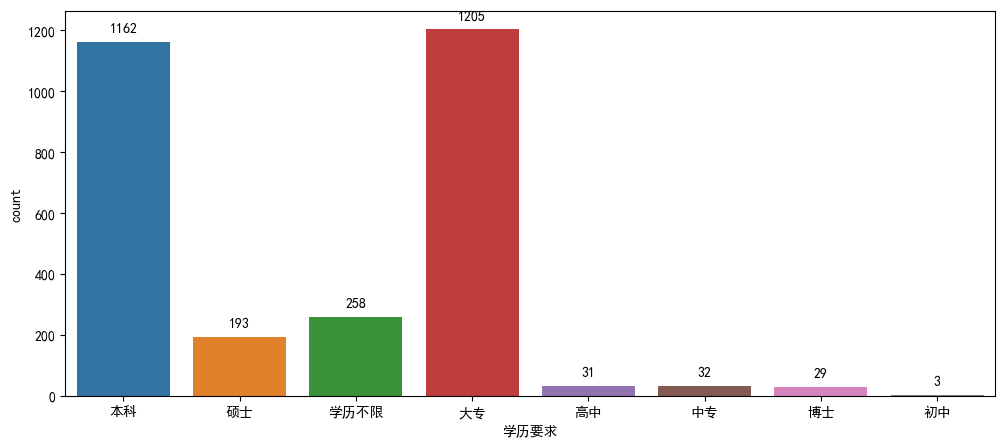

In [186]:
def  education(x):
    if operator.contains(x,'学历不限'):
        return '学历不限'
    elif operator.contains(x,'博士'):
        return '博士'
    elif operator.contains(x,'硕士'):
        return '硕士'
    elif operator.contains(x,'本科'):
        return '本科'
    elif operator.contains(x,'大专'):
        return '大专'
    elif operator.contains(x,'高中'):
        return '高中'
    elif operator.contains(x,'中专'):
        return '中专'
    elif operator.contains(x,'初中'):
        return '初中'
    else:
        return '其他'

boss['学历要求'] = boss['经验'].apply(education)

plt.figure(figsize=(12,5))
ax = sns.countplot(boss,x=boss['学历要求'])
#显示柱形图的数值标签
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

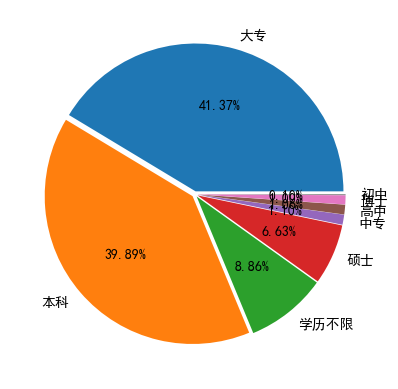

In [167]:
edu = boss['学历要求'].value_counts()
plt.pie(edu,labels=edu.index,explode=(0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02),autopct='%.2f%%')
plt.show()

#绝大多数企业要求的学历都是本科、大专及以上，一定程度上也说明了社会上这两个学历的人数众多

## 规模

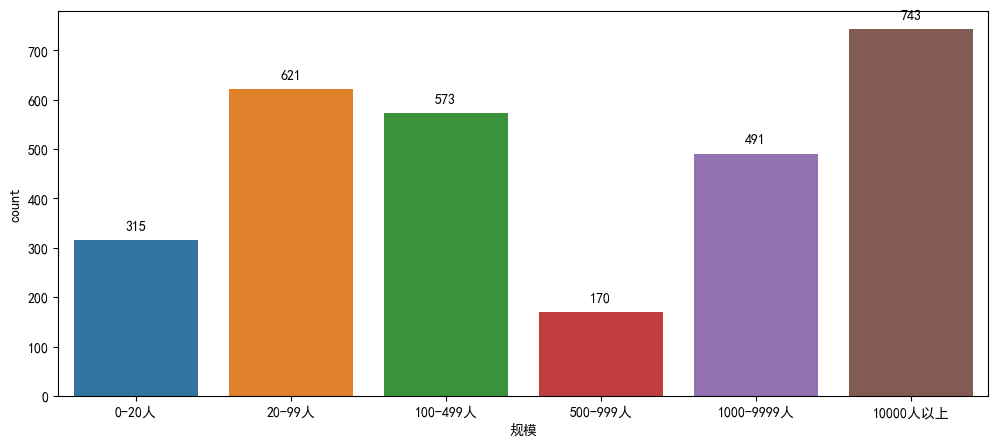

In [183]:
plt.figure(figsize=(12,5))
order=['0-20人','20-99人','100-499人','500-999人','1000-9999人','10000人以上']
ax = sns.countplot(boss,x=boss['规模'],order=order)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# 大规模的企业占到了最大多数，其次是20-99人和100-499人

## 福利

In [169]:
boss['五险一金'] = boss['福利'].apply(lambda x: operator.contains(str(x),'五险一金'))
boss['五险一金'].replace({True:'有',False:'无'})
boss['住房补贴'] = boss['福利'].apply(lambda x: operator.contains(str(x),'住房补贴') or operator.contains(str(x),'宿舍'))
boss['住房补贴'].replace({True:'有',False:'无'})

0       无
1       无
2       无
3       无
4       无
       ..
2908    无
2909    无
2910    无
2911    无
2912    无
Name: 住房补贴, Length: 2913, dtype: object

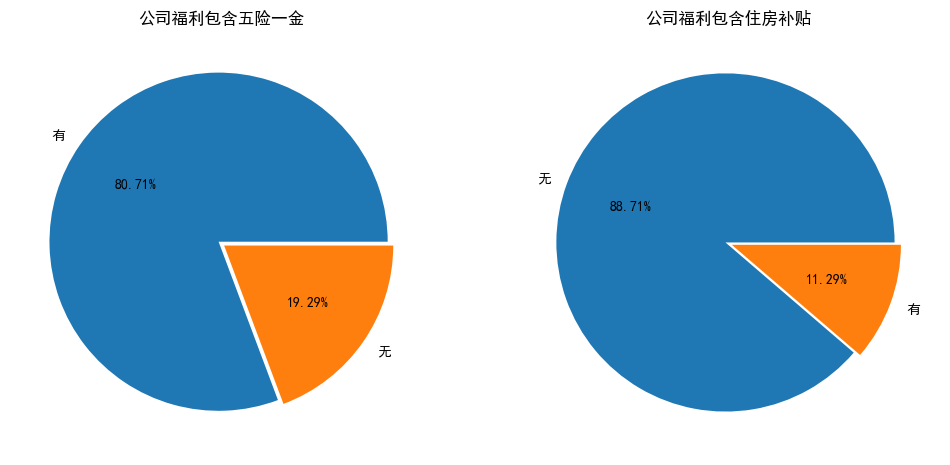

In [170]:
Five_one  = boss['五险一金'].replace({True:'有',False:'无'}).value_counts()
Housing_subsidies  = boss['住房补贴'].replace({True:'有',False:'无'}).value_counts()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(x=Five_one,labels=Five_one.index,autopct='%.2f%%',explode=(0.02,0.02))
plt.title('公司福利包含五险一金')
plt.subplot(1,2,2)
plt.pie(x=Housing_subsidies,labels=Housing_subsidies.index,autopct='%.2f%%',explode=(0.02,0.02))
plt.title('公司福利包含住房补贴')
plt.show()

#福利方面绝大多数公司有五险一金并且没有包含住房补贴或提供宿舍

# 薪资深入分析

## 实习生与正式工的薪资分布

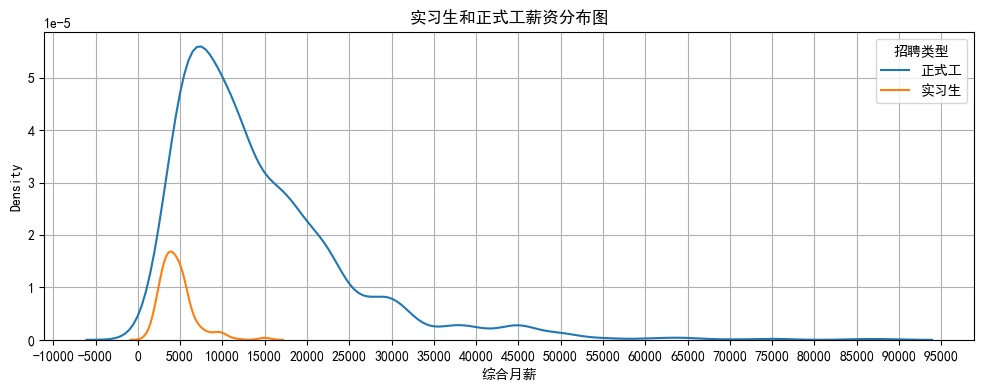

In [187]:
plt.figure(figsize=(12,4))
sns.kdeplot(boss,x='综合月薪',hue='招聘类型')
plt.title('实习生和正式工薪资分布图')
plt.xticks(range(-10000,100000,5000))
plt.grid(True)  # 显示网格线
plt.show()

#正式工的工资比实习生整体要高出2000-3000元左右

## 各个岗位的薪资分布

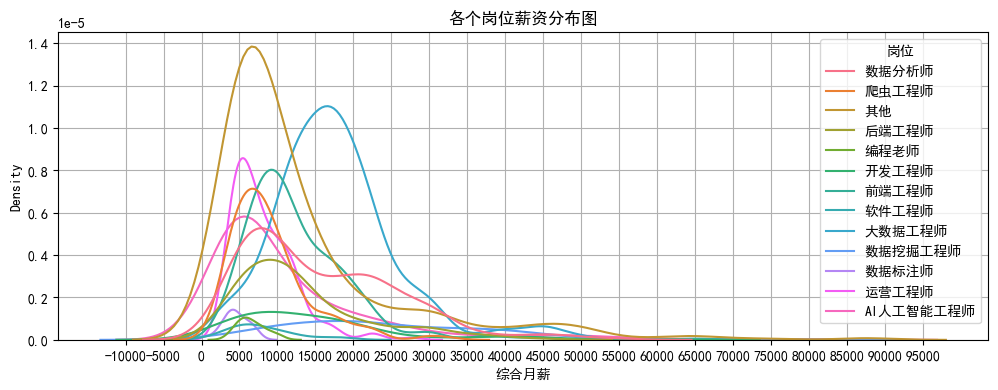

In [188]:
plt.figure(figsize=(12,4))
sns.kdeplot(boss,x='综合月薪',hue='岗位')
plt.title('各个岗位薪资分布图')
plt.xticks(range(-10000,100000,5000))
plt.grid(True)  # 显示网格线
plt.show()

#在各个岗位的薪资分布中，明显大数据工程师的薪资分布要略高于各个岗位

## 各个城市的薪资分布

In [ ]:
# 太多城市了不好画

In [173]:
# Formal_worker = boss[boss['招聘类型'] == '正式工']
# Formal_worker_salary_city = Formal_worker.groupby(by=['市','招聘类型']).agg({'综合月薪':'mean'})
# Formal_worker_salary_city

In [174]:
# boss.groupby(by='市').agg({'综合月薪':'mean'})
# plt.figure(figsize=(12,4))
# sns.barplot(Formal_worker_salary_city,x=Formal_worker_salary_city['综合月薪'])
# plt.title('各个城市薪资分布图')
# plt.xticks(range(-10000,100000,5000))

## 学历和工资是否有直接的关系

In [175]:
boss['学历代码'] = boss['学历要求'].replace({'博士':8,'硕士':7,'本科':6,'大专':5,'高中':4,'中专':3,'初中':2,'学历不限':1})

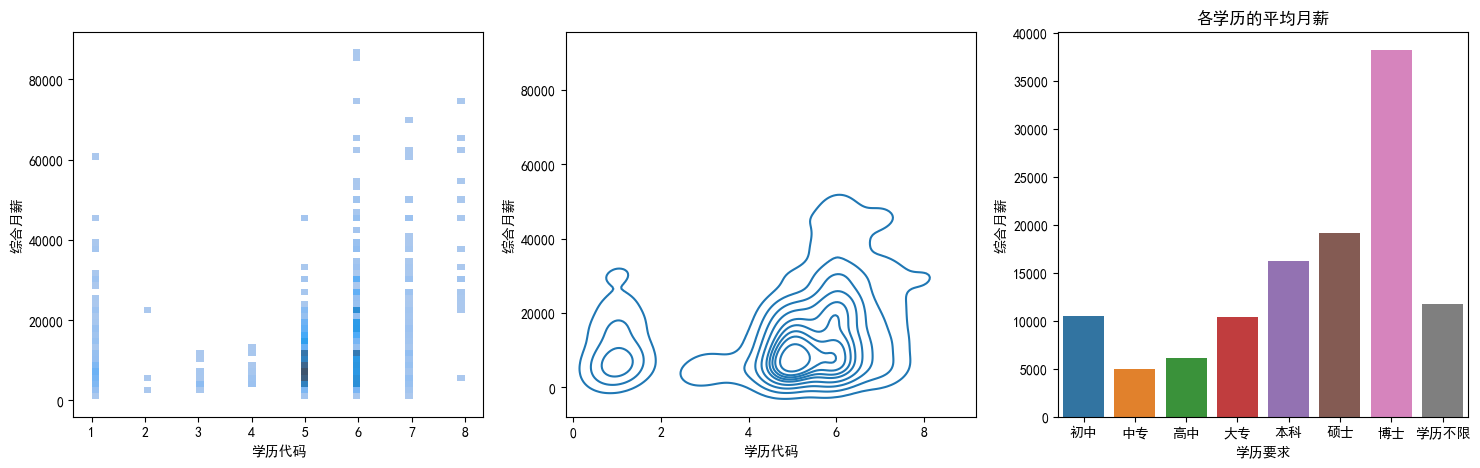

In [194]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(boss,x='学历代码',y='综合月薪',ax=axes[0])
plt.title('各学历的月薪分布情况')

sns.kdeplot(boss,x='学历代码',y='综合月薪',kind='kde',ax=axes[1])
plt.title('各学历的月薪分布情况')

mean_salary = boss.groupby(by='学历要求').agg({'综合月薪':'mean'})
mean_salary.reset_index(inplace=True)  # 重置索引
order = ['初中','中专','高中','大专','本科','硕士','博士','学历不限']
sns.barplot(data=mean_salary,x = '学历要求' , y = '综合月薪',ax=axes[2],order = order)
plt.title('各学历的平均月薪')
plt.show()

# 由最后的学历与其平均薪资可以看出学历越高，基本上工资就越高

## 不同规模公司的工资

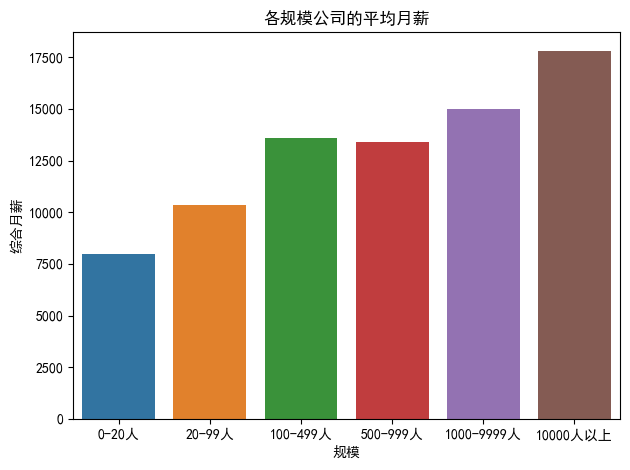

In [197]:
mean_salary = boss.groupby(by='规模').agg({'综合月薪':'mean'})
mean_salary.reset_index(inplace=True)  # 重置索引
order=['0-20人','20-99人','100-499人','500-999人','1000-9999人','10000人以上']
sns.barplot(data=mean_salary,x = '规模' , y = '综合月薪',order = order)
plt.title('各规模公司的平均月薪')
plt.show()

# 很明显，规模越大的公司薪资也越高

## 对四大一线城市进行薪资分析

<Axes: xlabel='市', ylabel='综合月薪'>

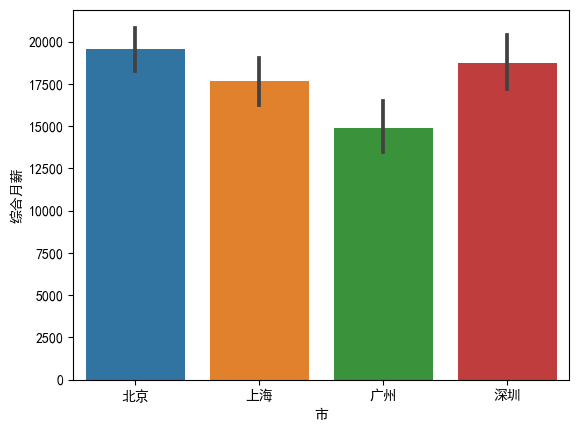

In [213]:
one_citys = ['北京','上海','广州','深圳']
one_city = boss[boss['市'].isin(one_citys)]
# one_city.groupby(by='市').agg({'综合月薪':'mean'})

sns.barplot(one_city,x='市',y='综合月薪',order = one_citys)

# 在四大一线城市的IT行业薪资中，明显广州的薪资要略低于其他三个城市，而北京上海深圳相差不大

# 拓展

## 福利词云图来展示。

In [233]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# font_path = 'C:/Users/DELL/.vscode/extensions/stxr.iconfont-preview-0.0.5/node_modules/fonteditor-core/lib/ttf'  # 替换为您的中文字体文件路径
# plt.rcParams['font.sans-serif'] = ['Font Name']  # 替换为您安装的字体的名称
# plt.rcParams['axes.unicode_minus'] = False

# text = ' '.join(boss['福利'].fillna('').astype(str))

# wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

OSError: cannot open resource